In [8]:
import pandas as pd

df = df = pd.read_csv('Projeto Bee Defender.csv', encoding='latin1', delimiter=';')


In [9]:
df.head()


,Nome,Custo,Calendário_da_tarefa,Data_da_restrição,Data_limite,Duração_Agendada,Início,Duração,Início_da_Entrega,Término
0,Planejamento Inicial,"R$ 10.000,00",Nenhum,Seg 27/05/24,ND,30 dias,Seg 27/05/24,30 dias,ND,Sex 05/07/24
1,Legalização e Registro,"R$ 6.400,00",Nenhum,ND,ND,15 dias,Seg 08/07/24,15 dias,ND,Sex 26/07/24
2,Pesquisa e Desenvolvimentos,"R$ 10.000,00",Nenhum,ND,ND,90 dias,Seg 08/07/24,90 dias,ND,Sex 08/11/24
3,Infraestrutura e Instalações,"R$ 20.000,00",Nenhum,ND,ND,60 dias,Seg 29/07/24,60 dias,ND,Sex 18/10/24
4,Recrutamento,"R$ 10.000,00",Nenhum,ND,ND,30 dias,Seg 21/10/24,30 dias,ND,Sex 29/11/24


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num

# Carregar os dados
df = pd.read_csv('Projeto Bee Defender.csv', encoding='latin1', delimiter=';')

# Convertendo o custo para um formato numérico
df['Custo'] = df['Custo'].str.replace('R$', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Convertendo datas para o formato datetime
df['Início'] = pd.to_datetime(df['Início'], format='%a %d/%m/%y', errors='coerce')
df['Término'] = pd.to_datetime(df['Término'], format='%a %d/%m/%y', errors='coerce')

# Calculando a duração em dias
df['Duração_Dias'] = (df['Término'] - df['Início']).dt.days

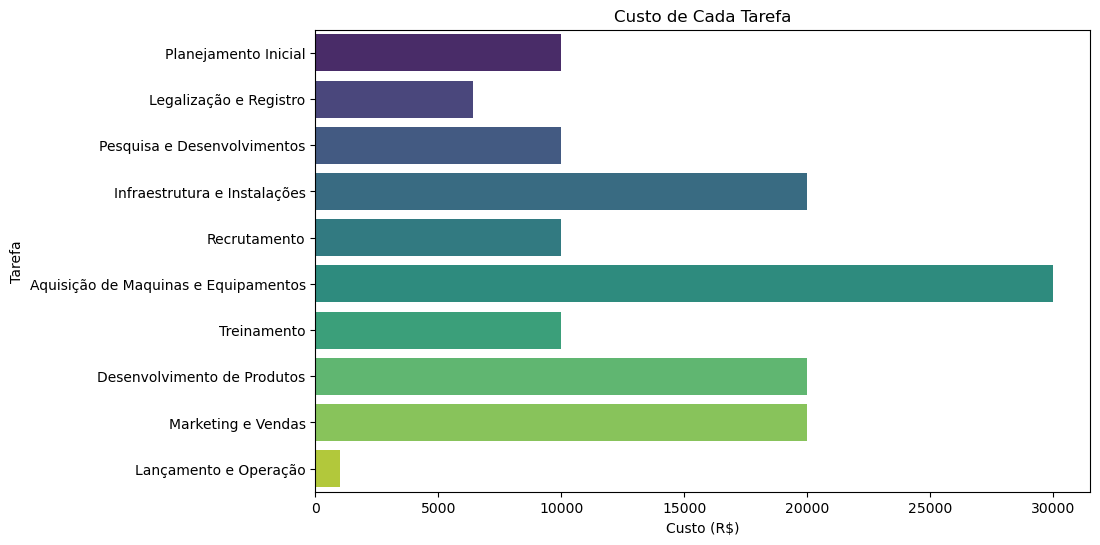

In [11]:
# Plot 1: Gráfico de barras mostrando o custo de cada tarefa
plt.figure(figsize=(10, 6))
sns.barplot(x='Custo', y='Nome', data=df, palette='viridis')
plt.title('Custo de Cada Tarefa')
plt.xlabel('Custo (R$)')
plt.ylabel('Tarefa')
plt.show()

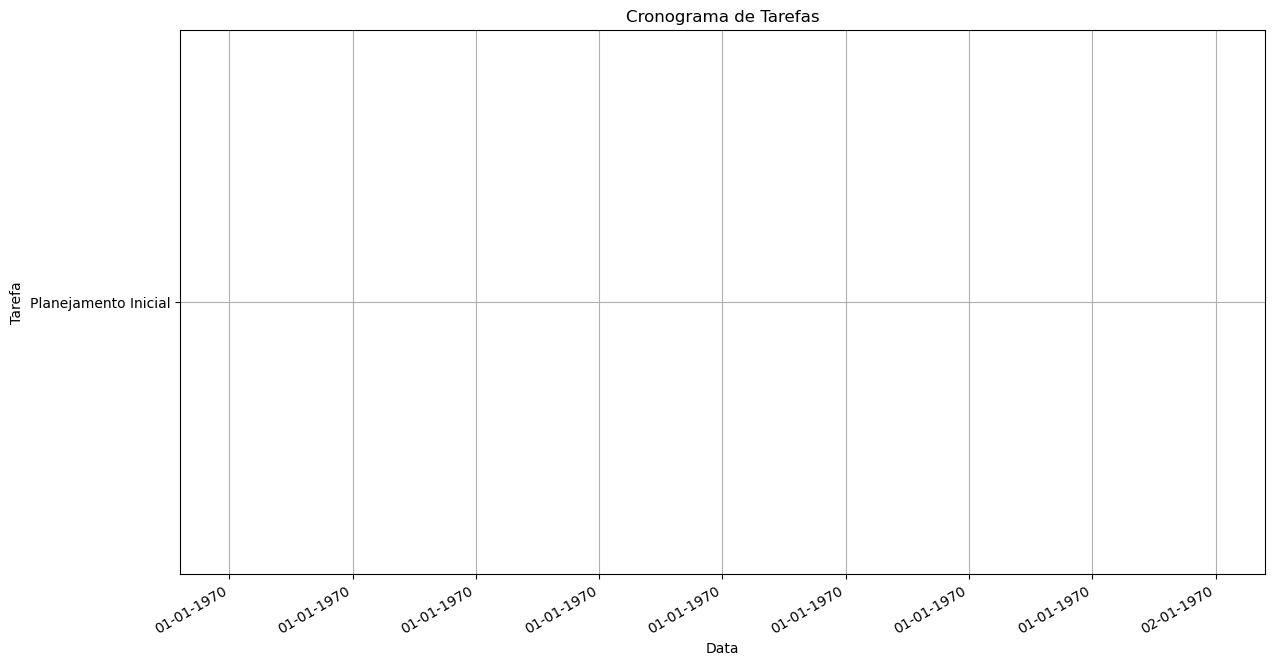

In [12]:
# Plot 2: Gráfico de Gantt mostrando o cronograma das tarefas
plt.figure(figsize=(14, 8))
plt.barh(df['Nome'], date2num(df['Término']) - date2num(df['Início']), left=date2num(df['Início']), color='skyblue')
plt.xlabel('Data')
plt.ylabel('Tarefa')
plt.title('Cronograma de Tarefas')
plt.grid(True)

# Ajustar o formato das datas no eixo x
plt.gca().xaxis_date()
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()  # Rotacionar datas para melhor visualização

plt.show()

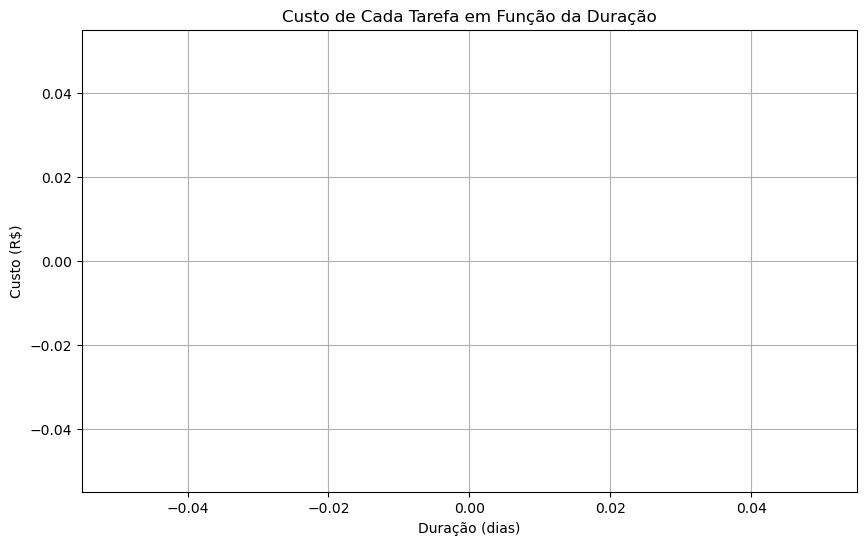

In [13]:
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('Projeto Bee Defender.csv', encoding='latin1', delimiter=';')

# Convertendo o custo para um formato numérico
df['Custo'] = df['Custo'].str.replace('R$', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Convertendo datas para o formato datetime
df['Início'] = pd.to_datetime(df['Início'], format='%a %d/%m/%y', errors='coerce')
df['Término'] = pd.to_datetime(df['Término'], format='%a %d/%m/%y', errors='coerce')

# Calculando a duração em dias
df['Duração_Dias'] = (df['Término'] - df['Início']).dt.days

# Remover linhas com dados faltantes
df = df.dropna(subset=['Custo', 'Duração_Dias'])

# Plot: Gráfico de dispersão mostrando o custo em função da duração
plt.figure(figsize=(10, 6))
plt.scatter(df['Duração_Dias'], df['Custo'], color='blue')
plt.title('Custo de Cada Tarefa em Função da Duração')
plt.xlabel('Duração (dias)')
plt.ylabel('Custo (R$)')
plt.grid(True)

# Adicionar anotações com o nome das tarefas
for i, row in df.iterrows():
    plt.annotate(row['Nome'], (row['Duração_Dias'], row['Custo']), textcoords="offset points", xytext=(5,5), ha='center')

plt.show()

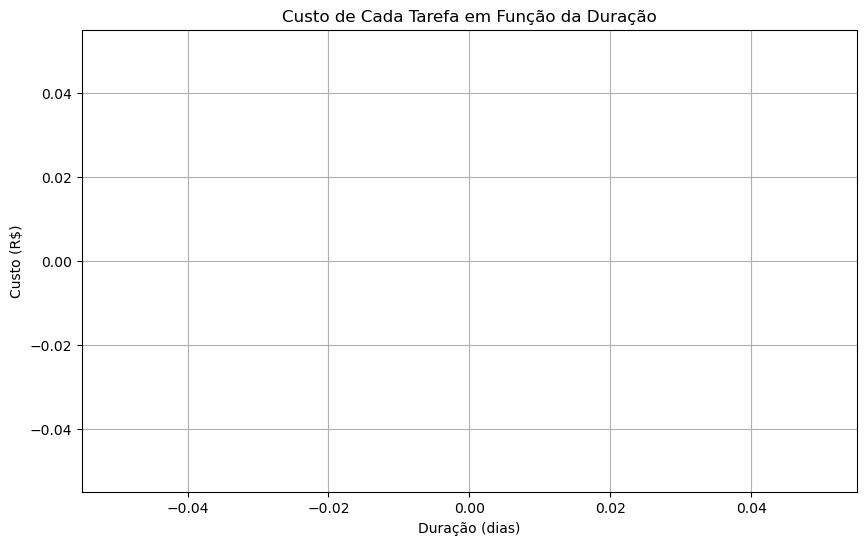

In [14]:
# Carregar os dados
df = pd.read_csv('Projeto Bee Defender.csv', encoding='latin1', delimiter=';')

# Convertendo o custo para um formato numérico
df['Custo'] = df['Custo'].str.replace('R$', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Convertendo datas para o formato datetime
df['Início'] = pd.to_datetime(df['Início'], format='%a %d/%m/%y', errors='coerce')
df['Término'] = pd.to_datetime(df['Término'], format='%a %d/%m/%y', errors='coerce')

# Calculando a duração em dias
df['Duração_Dias'] = (df['Término'] - df['Início']).dt.days

# Remover linhas com dados faltantes
df = df.dropna(subset=['Custo', 'Duração_Dias'])

# Ordenar os dados pela duração das tarefas
df = df.sort_values(by='Duração_Dias')

# Plot: Gráfico de linha mostrando o custo em função da duração
plt.figure(figsize=(10, 6))
plt.plot(df['Duração_Dias'], df['Custo'], marker='o', linestyle='-', color='blue')
plt.title('Custo de Cada Tarefa em Função da Duração')
plt.xlabel('Duração (dias)')
plt.ylabel('Custo (R$)')
plt.grid(True)

# Adicionar anotações com o nome das tarefas
for i, row in df.iterrows():
    plt.annotate(row['Nome'], (row['Duração_Dias'], row['Custo']), textcoords="offset points", xytext=(5,5), ha='center')

plt.show()


Correlação entre custo e duração: nan


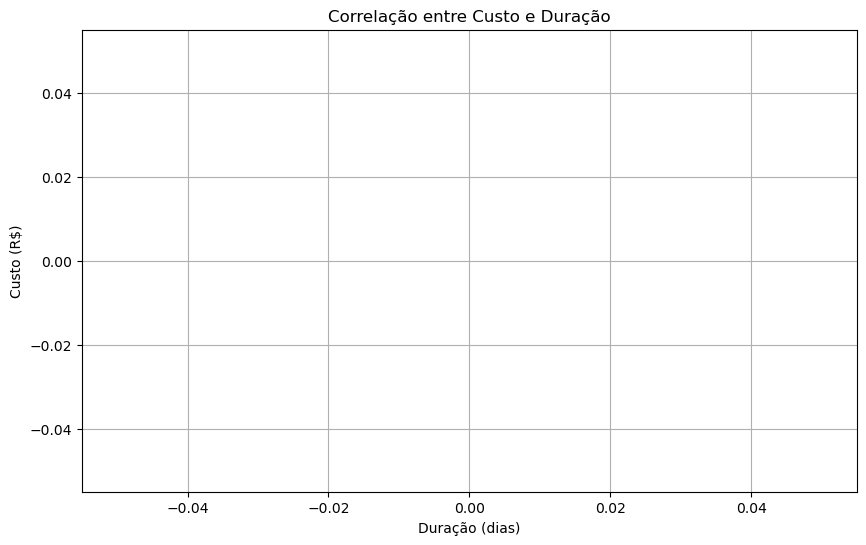

In [15]:
# Calculando a correlação
correlation = df['Custo'].corr(df['Duração_Dias'])
print(f'Correlação entre custo e duração: {correlation}')

# Plot: Scatter plot com linha de tendência
plt.figure(figsize=(10, 6))
sns.regplot(x='Duração_Dias', y='Custo', data=df, color='green', line_kws={'color': 'red'})
plt.title('Correlação entre Custo e Duração')
plt.xlabel('Duração (dias)')
plt.ylabel('Custo (R$)')
plt.grid(True)
plt.show()

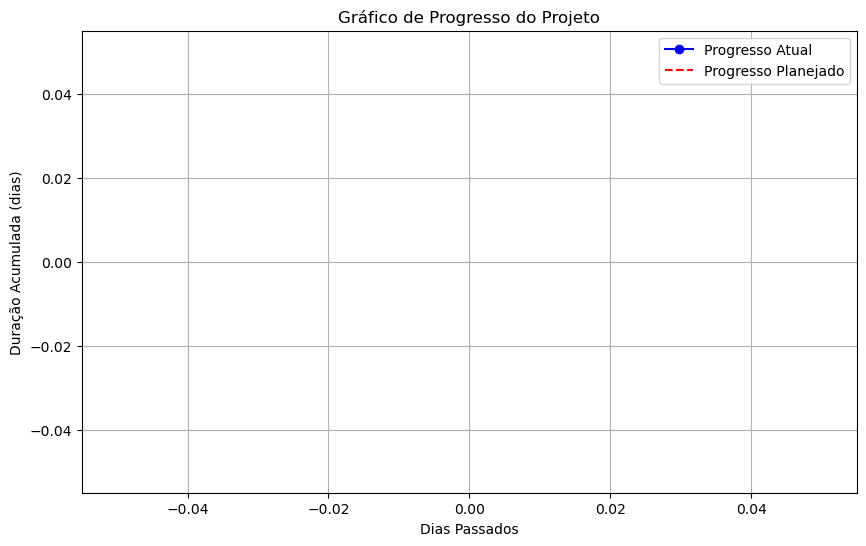

In [16]:
# Exemplo de gráfico burndown
df['Dias_Passados'] = (df['Início'] - df['Início'].min()).dt.days
df['Progresso_Acumulado'] = df['Duração_Dias'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(df['Dias_Passados'], df['Progresso_Acumulado'], marker='o', color='blue', label='Progresso Atual')
plt.plot(df['Dias_Passados'], df['Duração_Dias'].cumsum(), linestyle='--', color='red', label='Progresso Planejado')
plt.title('Gráfico de Progresso do Projeto')
plt.xlabel('Dias Passados')
plt.ylabel('Duração Acumulada (dias)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Identificação de tarefas críticas (exemplo simples)
tarefas_criticas = df[df['Duração_Dias'] > df['Duração_Dias'].quantile(0.75)]

plt.figure(figsize=(10, 6))
sns.barplot(x='Duração_Dias', y='Nome', data=tarefas_criticas, palette='Reds_r')
plt.title('Tarefas Críticas com Maior Duração')
plt.xlabel('Duração (dias)')
plt.ylabel('Tarefa')
plt.grid(True)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

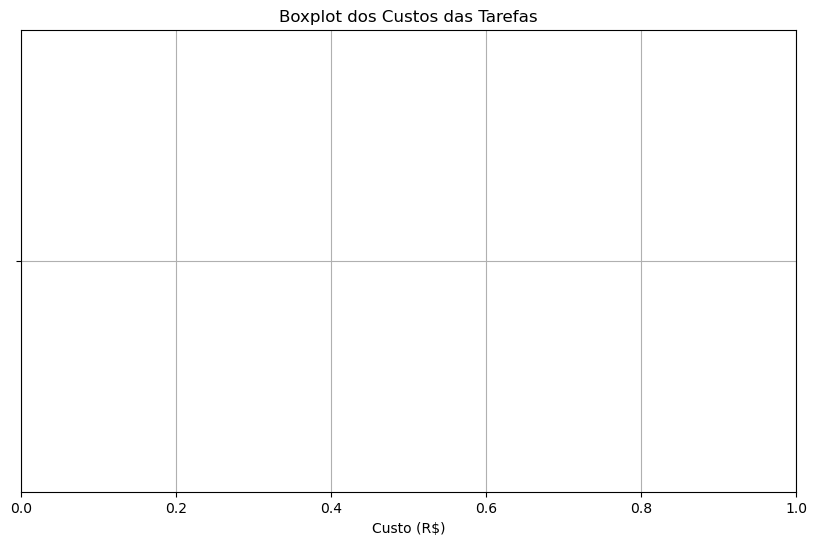

In [18]:
# Plot: Boxplot dos custos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Custo'], color='orange')
plt.title('Boxplot dos Custos das Tarefas')
plt.xlabel('Custo (R$)')
plt.grid(True)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

# Carregar os dados
df = pd.read_csv('Projeto Bee Defender.csv', encoding='latin1', delimiter=';')

# Convertendo o custo para um formato numérico
df['Custo'] = df['Custo'].str.replace('R$', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Convertendo datas para o formato datetime
df['Início'] = pd.to_datetime(df['Início'], format='%a %d/%m/%y', errors='coerce')
df['Término'] = pd.to_datetime(df['Término'], format='%a %d/%m/%y', errors='coerce')

# Calculando a duração em dias
df['Duração_Dias'] = (df['Término'] - df['Início']).dt.days

# Assumindo que a coluna 'Dependências' existe e contém nomes das tarefas das quais a tarefa depende
df['Dependências'] = df['Dependências'].fillna('')  # Preencher NaNs com strings vazias

# Criar o grafo
G = nx.DiGraph()

# Adicionar nós e arestas
for i, row in df.iterrows():
    G.add_node(row['Nome'], custo=row['Custo'], inicio=row['Início'], termino=row['Término'], duracao=row['Duração_Dias'])
    if row['Dependências']:
        dependencias = row['Dependências'].split(',')  # Supondo que as dependências estejam separadas por vírgula
        for dep in dependencias:
            G.add_edge(dep.strip(), row['Nome'])  # Adicionar arestas entre dependências e a tarefa atual

# Plotar o grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Gráfico de Dependência de Tarefas')
plt.show()

KeyError: 'Dependências'

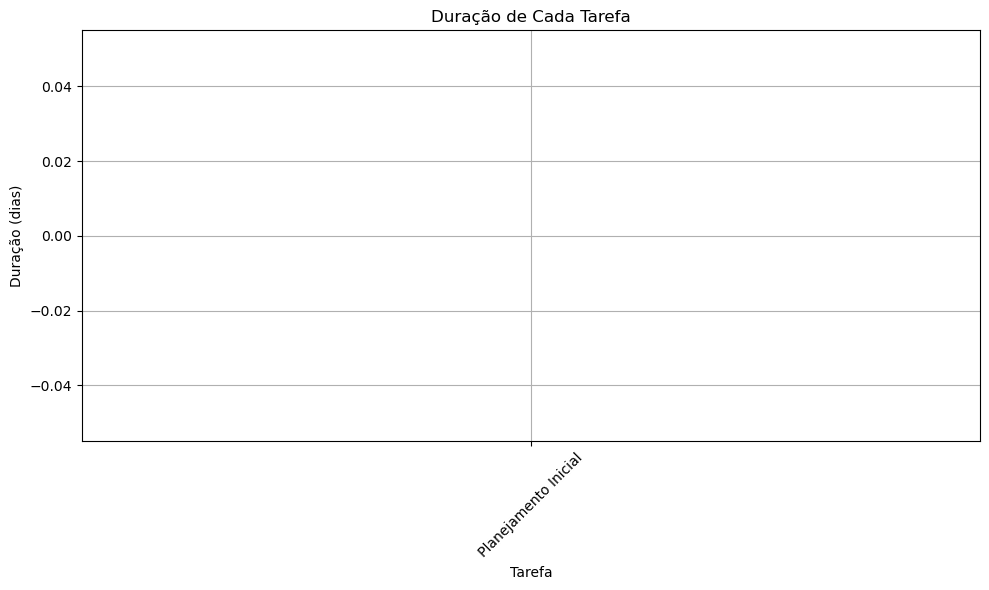

In [20]:
# Convertendo datas para o formato datetime
df['Início'] = pd.to_datetime(df['Início'], format='%a %d/%m/%y', errors='coerce')
df['Término'] = pd.to_datetime(df['Término'], format='%a %d/%m/%y', errors='coerce')

# Calculando a duração em dias
df['Duração_Dias'] = (df['Término'] - df['Início']).dt.days

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df['Nome'], df['Duração_Dias'], marker='o')
plt.xlabel('Tarefa')
plt.ylabel('Duração (dias)')
plt.title('Duração de Cada Tarefa')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

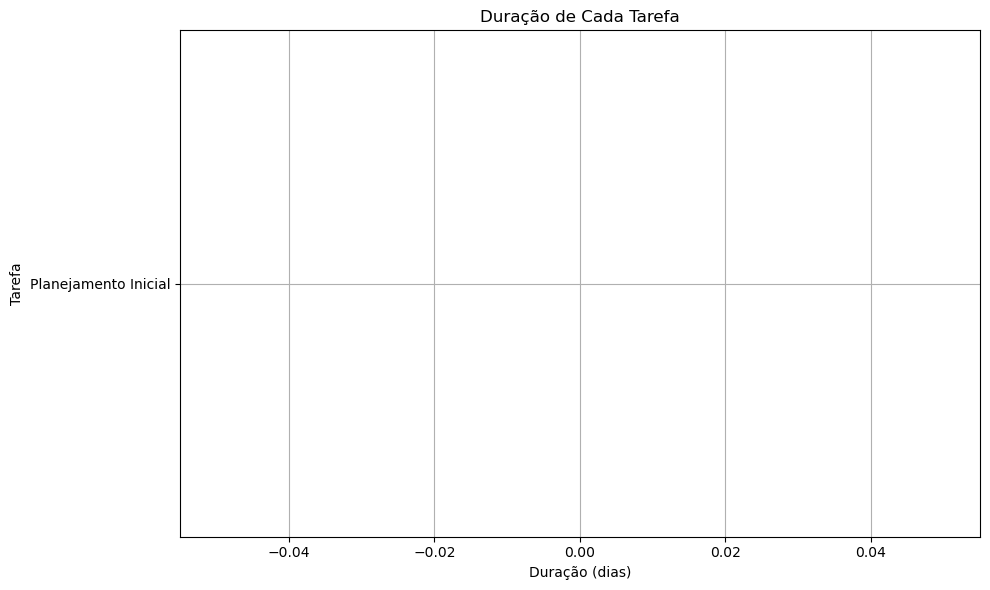

In [21]:
# Criar o gráfico de barras mostrando a duração de cada tarefa
plt.figure(figsize=(10, 6))
plt.barh(df['Nome'], df['Duração_Dias'], color='skyblue')
plt.xlabel('Duração (dias)')
plt.ylabel('Tarefa')
plt.title('Duração de Cada Tarefa')
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [22]:
# Carregar os dados
df = pd.read_csv('Projeto Bee Defender.csv', encoding='latin1', delimiter=';')

# Criar o gráfico de barras mostrando a duração de cada tarefa
plt.figure(figsize=(10, 6))
plt.bar(df['Nome'], df['Duração_Dias'], color='skyblue')
plt.xlabel('Tarefa')
plt.ylabel('Duração (dias)')
plt.title('Duração de Cada Tarefa')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

KeyError: 'Duração_Dias'

<Figure size 1000x600 with 0 Axes>

In [23]:
# Criar o gráfico de barras mostrando a duração de cada tarefa
plt.figure(figsize=(10, 6))
plt.bar(df['Nome'], df['Duração_Dias'], color='skyblue')
plt.xlabel('Tarefa')
plt.ylabel('Duração (dias)')
plt.title('Duração de Cada Tarefa')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

KeyError: 'Duração_Dias'

<Figure size 1000x600 with 0 Axes>

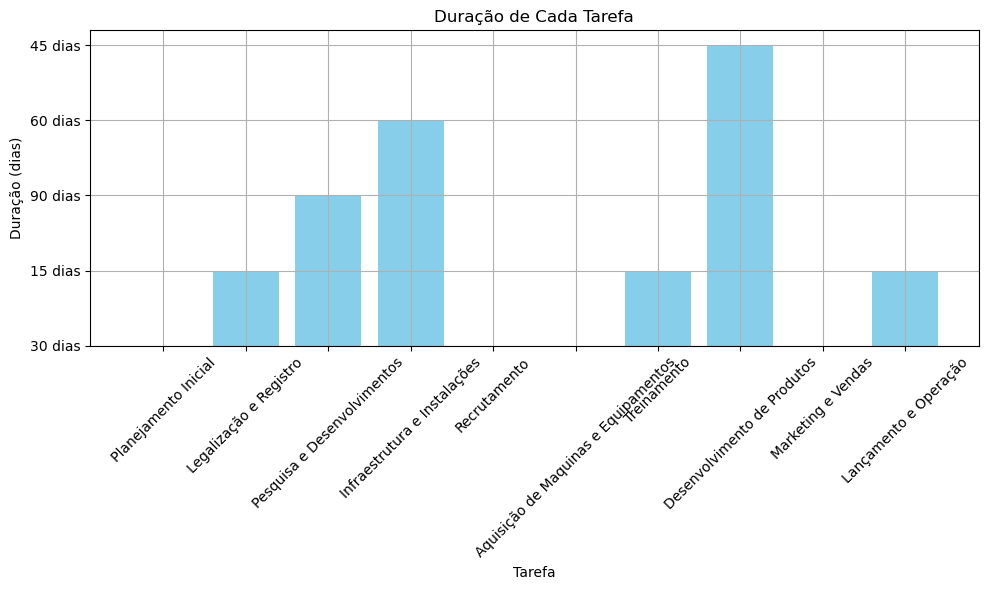

In [24]:
# Carregar os dados
df = pd.read_csv('Projeto Bee Defender.csv', encoding='latin1', delimiter=';')

# Criar o gráfico de barras mostrando a duração de cada tarefa
plt.figure(figsize=(10, 6))
plt.bar(df['Nome'], df['Duração'], color='skyblue')
plt.xlabel('Tarefa')
plt.ylabel('Duração (dias)')
plt.title('Duração de Cada Tarefa')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()